Before we get started, a couple of reminders to keep in mind when using iPython notebooks:

- Remember that you can see from the left side of a code cell when it was last run if there is a number within the brackets.
- When you start a new notebook session, make sure you run all of the cells up to the point where you last left off. Even if the output is still visible from when you ran the cells in your previous session, the kernel starts in a fresh state so you'll need to reload the data, etc. on a new session.
- The previous point is useful to keep in mind if your answers do not match what is expected in the lesson's quizzes. Try reloading the data and run all of the processing steps one by one in order to make sure that you are working with the same variables and data that are at each quiz stage.


## Load Data from CSVs

In [120]:
import unicodecsv

## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

def read_csv(file_name):
    with open(file_name, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)
    
enrollments = read_csv('enrollments.csv')
daily_engagement = read_csv('daily-engagement.csv')
project_submissions = read_csv('project-submissions.csv')

In [121]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.

print enrollments[0].keys()
print enrollments[0].values()
print '\n'
print daily_engagement[0].keys()
print daily_engagement[0].values()
print '\n'
print project_submissions[0].keys()
print project_submissions[0].values()

[u'status', u'is_udacity', u'is_canceled', u'join_date', u'account_key', u'cancel_date', u'days_to_cancel']
[u'canceled', u'True', u'True', u'2014-11-10', u'448', u'2015-01-14', u'65']


[u'lessons_completed', u'num_courses_visited', u'total_minutes_visited', u'projects_completed', u'acct', u'utc_date']
[u'0.0', u'1.0', u'11.6793745', u'0.0', u'0', u'2015-01-09']


[u'lesson_key', u'processing_state', u'account_key', u'assigned_rating', u'completion_date', u'creation_date']
[u'3176718735', u'EVALUATED', u'256', u'UNGRADED', u'2015-01-16', u'2015-01-14']


## Fixing Data Types

In [122]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [123]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{u'acct': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [124]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

## Problems in the Data

In [125]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".

def rename_key(input_list, old_key, new_key):
    for record in input_list:
        if old_key in record:
            record[new_key] = record.pop(old_key)

rename_key(daily_engagement, 'acct', 'account_key')
daily_engagement[0]

{'account_key': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

Note when running the above cells that we are actively changing the contents of our data variables. If you try to run these cells multiple times in the same session, an error will occur.

## Investigating the Data

In [126]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.

def unique_keys(input_list, key):
    keys = []
    for record in input_list:
        keys.append(record[key])
    return set(keys)

print enrollments[:2]
print '\n'
print 'enrollments records: ' + str(len(enrollments)) + ', unique students: ' + str(len(unique_keys(enrollments, 'account_key')))
print 'daily_engagement records: ' + str(len(daily_engagement)) + ', unique students: ' + str(len(unique_keys(daily_engagement, 'account_key')))
print 'project_submissions records: ' + str(len(project_submissions)) + ', unique students: ' + str(len(unique_keys(project_submissions, 'account_key')))

[{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 10, 0, 0), u'account_key': u'448', u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0), u'days_to_cancel': 65}, {u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 5, 0, 0), u'account_key': u'448', u'cancel_date': datetime.datetime(2014, 11, 10, 0, 0), u'days_to_cancel': 5}]


enrollments records: 1640, unique students: 1302
daily_engagement records: 136240, unique students: 1237
project_submissions records: 3642, unique students: 743


## Missing Engagement Records

In [127]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.

def list_difference(input_list1, key1, input_list2, key2):
    set1 = unique_keys(input_list1, key1)
    set2 = unique_keys(input_list2, key2)
    return set1.difference(set2)

        
enrollments_not_daily_engagement = list_difference(enrollments, 'account_key', daily_engagement, 'account_key')
print len(enrollments_not_daily_engagement)
print list(enrollments_not_daily_engagement)[0]

65
1304


## Checking for More Problem Records

In [128]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.

def enrollment_keys(enrollments, input_key, set_keys, output_key):
    for student in enrollments:
        if student[input_key] in set_keys:
            #print str(student[input_key]) + ' - ' +str(type(student[output_key]))
            if (student[output_key] is None) or (int(student[output_key]) > 0):
                print student
                
enrollment_keys(enrollments, 'account_key', enrollments_not_daily_engagement, 'days_to_cancel')

{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 1, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), u'days_to_cancel': 59}
{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 3, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), u'days_to_cancel': 99}
{u'status': u'current', u'is_udacity': True, u'is_canceled': False, u'join_date': datetime.datetime(2015, 2, 25, 0, 0), u'account_key': u'1101', u'cancel_date': None, u'days_to_cancel': None}


## Tracking Down the Remaining Problems

In [129]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
        #print enrollment
        
print len(udacity_test_accounts)

6


In [130]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [131]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print len(non_udacity_enrollments)
print len(non_udacity_engagement)
print len(non_udacity_submissions)

1622
135656
3634


## Refining the Question

In [132]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

paid_students = {}
for enrollment in non_udacity_enrollments:
    if (enrollment['days_to_cancel'] is None) or (enrollment['days_to_cancel'] > 7):
        
        #save latest enrollment data
        if enrollment['account_key'] not in paid_students or \
            enrollment['join_date'] > paid_students[enrollment['account_key']]:
                paid_students[enrollment['account_key']] = enrollment['join_date']
        
print len(paid_students)
print paid_students['108']

995
2015-04-20 00:00:00


## Getting Data from First Week

In [133]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and engagement_date >= join_date

#>>> (datetime.datetime(2015, 7, 9, 0, 0) - datetime.datetime(2015, 7, 11, 0, 0)).days
#-2
#>>> (datetime.datetime(2015, 7, 9, 0, 0) - datetime.datetime(2015, 7, 11, 0, 0)).days < 7
#True

In [134]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.

paid_engagement_in_first_week = []
for engagement in non_udacity_engagement:
    if engagement['account_key'] in paid_students and \
        paid_students[engagement['account_key']] and engagement['utc_date'] and \
        within_one_week(paid_students[engagement['account_key']], engagement['utc_date']):
        paid_engagement_in_first_week.append(engagement)
        if engagement['account_key'] == '108':
            print paid_students[engagement['account_key']], engagement['utc_date'], within_one_week(paid_students[engagement['account_key']], engagement['utc_date'])
    

print len(paid_engagement_in_first_week)
print paid_engagement_in_first_week[:2]

2015-04-20 00:00:00 2015-04-20 00:00:00 True
2015-04-20 00:00:00 2015-04-21 00:00:00 True
2015-04-20 00:00:00 2015-04-22 00:00:00 True
2015-04-20 00:00:00 2015-04-23 00:00:00 True
2015-04-20 00:00:00 2015-04-24 00:00:00 True
2015-04-20 00:00:00 2015-04-25 00:00:00 True
2015-04-20 00:00:00 2015-04-26 00:00:00 True
6919
[{u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 11.6793745, u'projects_completed': 0, 'account_key': u'0', u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 2, u'total_minutes_visited': 37.2848873333, u'projects_completed': 0, 'account_key': u'0', u'utc_date': datetime.datetime(2015, 1, 10, 0, 0)}]


## Exploring Student Engagement

In [135]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)
    if account_key == '108':
        print engagement_record
    
print engagement_by_account.keys()[:1]
print engagement_by_account.items()[:1]

{u'lessons_completed': 0, u'num_courses_visited': 2, u'total_minutes_visited': 25.9137858334, u'projects_completed': 0, 'account_key': u'108', u'utc_date': datetime.datetime(2015, 4, 20, 0, 0)}
{u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 3.40682316667, u'projects_completed': 0, 'account_key': u'108', u'utc_date': datetime.datetime(2015, 4, 21, 0, 0)}
{u'lessons_completed': 0, u'num_courses_visited': 2, u'total_minutes_visited': 99.1186611667, u'projects_completed': 0, 'account_key': u'108', u'utc_date': datetime.datetime(2015, 4, 22, 0, 0)}
{u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 35.8316206667, u'projects_completed': 2, 'account_key': u'108', u'utc_date': datetime.datetime(2015, 4, 23, 0, 0)}
{u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'108', u'utc_date': datetime.datetime(2015, 4, 24, 0, 0)}
{u'lessons_completed': 0, u'num_courses_

In [136]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)

def total_parameter_by_account(parameter, engagement_by_account):
    max_minutes = 0
    max_minutes_index = 0

    total_minutes_by_account = {}
    for account_key, engagement_for_student in engagement_by_account.items():
        total_minutes = 0
        for engagement_record in engagement_for_student:
            total_minutes += engagement_record[parameter]
        total_minutes_by_account[account_key] = total_minutes

        if total_minutes > max_minutes:
            max_minutes = total_minutes
            max_minutes_index = account_key
            print account_key, total_minutes
    return [total_minutes_by_account, max_minutes_index]

[total_minutes_by_account, max_minutes_index] = total_parameter_by_account('total_minutes_visited', engagement_by_account)

#print total_minutes_by_account.items()[:1]
print "'lessons_completed', 'num_courses_visited', 'total_minutes_visited', 'projects_completed', 'account_key', 'utc_date'"
for e in engagement_by_account[max_minutes_index]:
    print e['lessons_completed'], e['num_courses_visited'], int(e['total_minutes_visited']), e['projects_completed'], e['account_key'], e['utc_date']
    
for enrollment in non_udacity_enrollments:
    if enrollment['account_key'] == max_minutes_index:
        print enrollment


1200 696.577209833
347 713.347952499
811 1138.3177015
812 1764.53679833
1060 1768.52274933
140 2050.11567517
175 2375.79549867
317 2778.31614467
163 3564.7332645
'lessons_completed', 'num_courses_visited', 'total_minutes_visited', 'projects_completed', 'account_key', 'utc_date'
4 4 850 0 163 2015-07-09 00:00:00
6 6 872 0 163 2015-07-10 00:00:00
6 2 777 0 163 2015-07-11 00:00:00
2 1 294 0 163 2015-07-12 00:00:00
1 3 471 0 163 2015-07-13 00:00:00
1 2 298 0 163 2015-07-14 00:00:00
0 0 0 0 163 2015-07-15 00:00:00
{u'status': u'current', u'is_udacity': False, u'is_canceled': False, u'join_date': datetime.datetime(2015, 7, 9, 0, 0), u'account_key': u'163', u'cancel_date': None, u'days_to_cancel': None}


[4.79064933333, 0.0]
Mean: 143.326474267
Standard deviation: 269.538619011
Minimum: 0.0
Maximum: 1768.52274933


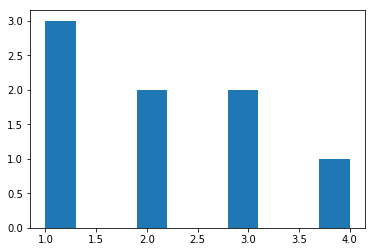

In [255]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Summarize the data about minutes spent in the classroom
def summarize_data(total_minutes):
    print total_minutes[:2]

    print 'Mean:', np.mean(total_minutes)
    print 'Standard deviation:', np.std(total_minutes)
    print 'Minimum:', np.min(total_minutes)
    print 'Maximum:', np.max(total_minutes)
    plt.hist(data)
    
summarize_data(total_minutes_by_account.values())

## Debugging Data Analysis Code

In [256]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.

#>>> (datetime.datetime(2015, 7, 9, 0, 0) - datetime.datetime(2015, 7, 11, 0, 0)).days
#-2
#>>> (datetime.datetime(2015, 7, 9, 0, 0) - datetime.datetime(2015, 7, 11, 0, 0)).days < 7
#True

## Lessons Completed in First Week

1200 1
344 4
811 9
812 20
885 27
633 36
[6, 1]
Mean: 1.63618090452
Standard deviation: 3.00256129983
Minimum: 0
Maximum: 36


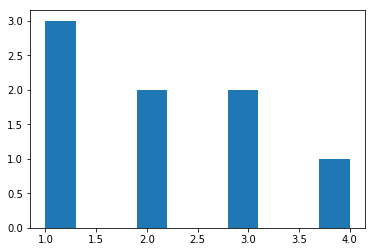

In [257]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.

[total_lessons_by_account, max_lesson_index] = total_parameter_by_account('lessons_completed', engagement_by_account)
summarize_data(total_lessons_by_account.values())

## Number of Visits in First Week

1200 6
344 7
[5, 3]
Mean: 2.86733668342
Standard deviation: 2.25519800292
Minimum: 0
Maximum: 7


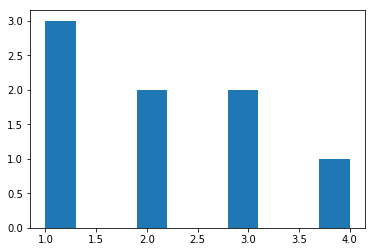

In [258]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom (any nanodegree) during the first week.

def total_parameter_occurence_by_account(parameter, engagement_by_account):
    max_minutes = 0
    max_minutes_index = 0

    total_minutes_by_account = {}
    for account_key, engagement_for_student in engagement_by_account.items():
        total_minutes = 0
        for engagement_record in engagement_for_student:
            if engagement_record[parameter] > 0:
                total_minutes += 1
        total_minutes_by_account[account_key] = total_minutes

        if total_minutes > max_minutes:
            max_minutes = total_minutes
            max_minutes_index = account_key
            print account_key, total_minutes
    return [total_minutes_by_account, max_minutes_index]

[total_class_visits_by_account, max_visits_index] = total_parameter_occurence_by_account('num_courses_visited', engagement_by_account)
summarize_data(total_class_visits_by_account.values())

## Splitting out Passing Students

In [259]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']

passing_engagement = {}
non_passing_engagement = {}


for submission in non_udacity_submissions:        
    if submission['account_key'] in engagement_by_account and \
        submission['lesson_key'] in subway_project_lesson_keys and \
        submission['processing_state'] == 'EVALUATED':
            if submission['assigned_rating'] in ['PASSED', 'DISTINCTION']:
                passing_engagement[submission['account_key']] = engagement_by_account[submission['account_key']]
                if submission['account_key'] in non_passing_engagement:
                    non_passing_engagement.pop(submission['account_key'])
                    #print 'removed from non_passing', submission['account_key']
                #print 'passing', submission['account_key']
            else:
                if submission['account_key'] not in passing_engagement:
                    non_passing_engagement[submission['account_key']] = engagement_by_account[submission['account_key']]
                    #print 'non passing', submission['account_key']

print len(engagement_by_account), len(passing_engagement), len(non_passing_engagement)
passing_engagement_list = [] 
for e_list in passing_engagement:
    for e in passing_engagement[e_list]:
        passing_engagement_list.append(e)

non_passing_engagement_list = [] 
for e_list in non_passing_engagement:
    for e in non_passing_engagement[e_list]:
        non_passing_engagement_list.append(e)
        
#print non_passing_engagement.items()[:1]
print len(passing_engagement_list)
print len(non_passing_engagement_list)
print '-------'

e = set(engagement_by_account.keys())
p = set(passing_engagement.keys())
n = set(non_passing_engagement.keys())
print len(e.difference(set(p.union(n))))
print len(p.intersection(n))

for submission in non_udacity_submissions:        
    if submission['lesson_key'] in subway_project_lesson_keys and \
        submission['account_key'] in list(e.difference(set(p.union(n)))):
        print 'submission', submission
        if submission['account_key'] in passing_engagement:
            print 'passing_engagement'
        if submission['account_key'] in non_passing_engagement:
            print 'non_passing_engagement'
        

995 647 33
4527
231
-------
315
0


In [260]:
def remove_free_trial_cancels(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data

paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

subway_project_lesson_keys = ['746169184', '3176718735']

pass_subway_project = set()

for submission in paid_submissions:
    project = submission['lesson_key']
    rating = submission['assigned_rating']    

    if ((project in subway_project_lesson_keys) and
            (rating == 'PASSED' or rating == 'DISTINCTION')):
        pass_subway_project.add(submission['account_key'])

len(pass_subway_project)

passing_engagement = []
non_passing_engagement = []

for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] in pass_subway_project:
        passing_engagement.append(engagement_record)
    else:
        non_passing_engagement.append(engagement_record)

print len(passing_engagement)
print len(non_passing_engagement)

4527
2392


## Comparing the Two Student Groups


passing_engagement: minutes spent in the classroom
[614.9778563333, 494.88049616599994]
Mean: 394.586046484
Standard deviation: 448.499519327
Minimum: 0.0
Maximum: 3564.7332645

non_passing_engagement: minutes spent in the classroom
[4.79064933333, 0.0]
Mean: 143.326474267
Standard deviation: 269.538619011
Minimum: 0.0
Maximum: 1768.52274933

passing_engagement: lessons completed
[4, 1]
Mean: 2.05255023184
Standard deviation: 3.14222705558
Minimum: 0
Maximum: 36

non_passing_engagement: lessons completed
[0, 0]
Mean: 0.862068965517
Standard deviation: 2.54915994183
Minimum: 0
Maximum: 27

passing_engagement: days visited
[6, 6]
Mean: 3.38485316847
Standard deviation: 2.25882147092
Minimum: 0
Maximum: 7

non_passing_engagement: days visited
[3, 0]
Mean: 1.90517241379
Standard deviation: 1.90573144136
Minimum: 0
Maximum: 7


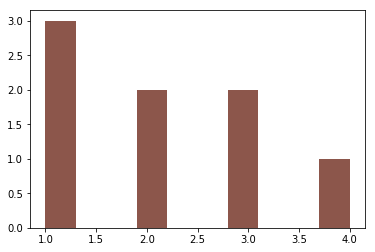

In [261]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).

def total_parameter_by_account_input_list(parameter, key, engagement_by_account):
    total_minutes_by_account = {}
    for engagement_record in engagement_by_account:
        #print engagement_record
        if engagement_record[key] not in total_minutes_by_account:
            total_minutes_by_account[engagement_record[key]] = 0
        total_minutes_by_account[engagement_record[key]] += engagement_record[parameter]

    return total_minutes_by_account

def total_parameter_occurence_by_account_input_list(parameter, parameter2, key, engagement_by_account):
    total_minutes_by_account = {}
    for engagement_record in engagement_by_account:
        if engagement_record[key] not in total_minutes_by_account:
            total_minutes_by_account[engagement_record[key]] = []
        if engagement_record[parameter] not in total_minutes_by_account[engagement_record[key]] and \
            engagement_record[parameter2] > 0:
            total_minutes_by_account[engagement_record[key]].append(engagement_record[parameter])

    #print total_minutes_by_account.items()[:5]
    total_parameter_occurence_by_account = {}
    for user in total_minutes_by_account.keys():
        total_parameter_occurence_by_account[user] = len(total_minutes_by_account[user])
    return total_parameter_occurence_by_account

print '\npassing_engagement: minutes spent in the classroom'
total_minutes_by_account_passing = total_parameter_by_account_input_list('total_minutes_visited', 'account_key', passing_engagement)
#print total_minutes_by_account_passing
summarize_data(total_minutes_by_account_passing.values())

print '\nnon_passing_engagement: minutes spent in the classroom'
total_minutes_by_account_non_passing = total_parameter_by_account_input_list('total_minutes_visited', 'account_key', non_passing_engagement)
#print total_minutes_by_account_non_passing
summarize_data(total_minutes_by_account_non_passing.values())

print '\npassing_engagement: lessons completed'
lessons_completed_by_account_passing = total_parameter_by_account_input_list('lessons_completed', 'account_key', passing_engagement)
#print lessons_completed_by_account_passing
summarize_data(lessons_completed_by_account_passing.values())

print '\nnon_passing_engagement: lessons completed'
lessons_completed_by_account_non_passing = total_parameter_by_account_input_list('lessons_completed', 'account_key', non_passing_engagement)
#print lessons_completed_by_account_non_passing
summarize_data(lessons_completed_by_account_non_passing.values())

print '\npassing_engagement: days visited'
days_visited_by_account_passing = total_parameter_occurence_by_account_input_list('utc_date', 'num_courses_visited', 'account_key', passing_engagement)
#print days_visited_by_account_passing
summarize_data(days_visited_by_account_passing.values())

print '\nnon_passing_engagement: days visited'
days_visited_by_account_non_passing = total_parameter_occurence_by_account_input_list('utc_date', 'num_courses_visited', 'account_key', non_passing_engagement)
#print days_visited_by_account_non_passing
summarize_data(days_visited_by_account_non_passing.values())

## Making Histograms


passing_engagement: minutes spent in the classroom

non_passing_engagement: minutes spent in the classroom


(array([ 226.,   46.,   21.,   13.,   12.,    5.,    1.,    8.,    3.,
           3.,    2.,    0.,    1.,    0.,    1.,    4.,    0.,    0.,
           0.,    2.]),
 array([    0.        ,    88.42613747,   176.85227493,   265.2784124 ,
          353.70454987,   442.13068733,   530.5568248 ,   618.98296227,
          707.40909973,   795.8352372 ,   884.26137467,   972.68751213,
         1061.1136496 ,  1149.53978707,  1237.96592453,  1326.392062  ,
         1414.81819947,  1503.24433693,  1591.6704744 ,  1680.09661187,
         1768.52274933]),
 <a list of 20 Patch objects>)

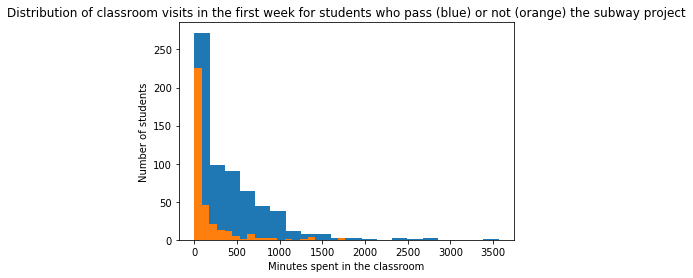

In [300]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.

#data = [1, 2, 1, 3, 3, 1, 4, 2]

%matplotlib inline
import matplotlib.pyplot as plt
#plt.hist(data)

print '\npassing_engagement: minutes spent in the classroom'
total_minutes_by_account_passing = total_parameter_by_account_input_list('total_minutes_visited', 'account_key', passing_engagement)
plt.hist(total_minutes_by_account_passing.values(), bins=20)
plt.xlabel("Minutes spent in the classroom")
plt.ylabel("Number of students")
plt.title('Distribution of classroom visits in the first week ' + 
          'for students who pass (blue) or not (orange) the subway project')

print '\nnon_passing_engagement: minutes spent in the classroom'
plt.hist(total_minutes_by_account_non_passing.values(), bins=20)



passing_engagement: minutes spent in the classroom

non_passing_engagement: minutes spent in the classroom


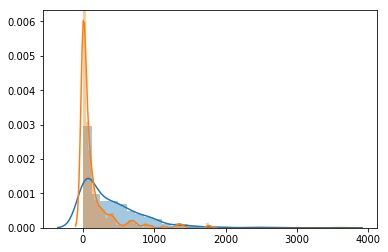

In [291]:
import seaborn as sns

print '\npassing_engagement: minutes spent in the classroom'
total_minutes_by_account_passing = total_parameter_by_account_input_list('total_minutes_visited', 'account_key', passing_engagement)
#sns.xlabel("Minutes spent in the classroom")
#sns.ylabel("Number of students")
#sns.title("Student engagement")
sns.distplot(total_minutes_by_account_passing.values())

print '\nnon_passing_engagement: minutes spent in the classroom'
sns.distplot(total_minutes_by_account_non_passing.values())



passing_engagement: lessons completed

non_passing_engagement: lessons completed


(array([ 302.,   15.,   12.,    5.,    2.,    4.,    3.,    1.,    1.,
           0.,    0.,    1.,    0.,    0.,    1.,    0.,    0.,    0.,
           0.,    1.]),
 array([  0.  ,   1.35,   2.7 ,   4.05,   5.4 ,   6.75,   8.1 ,   9.45,
         10.8 ,  12.15,  13.5 ,  14.85,  16.2 ,  17.55,  18.9 ,  20.25,
         21.6 ,  22.95,  24.3 ,  25.65,  27.  ]),
 <a list of 20 Patch objects>)

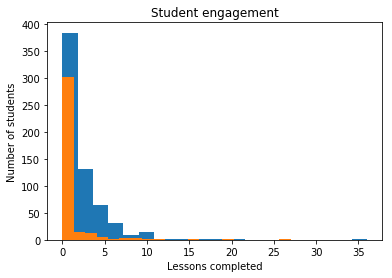

In [292]:
print '\npassing_engagement: lessons completed'
plt.xlabel("Lessons completed")
plt.ylabel("Number of students")
plt.title("Student engagement")
plt.hist(lessons_completed_by_account_passing.values(), bins=20)

print '\nnon_passing_engagement: lessons completed'
plt.hist(lessons_completed_by_account_non_passing.values(), bins=20)


passing_engagement: days visited

non_passing_engagement: days visited


(array([ 97.,   0.,  90.,   0.,   0.,  56.,   0.,   0.,  41.,   0.,   0.,
         15.,   0.,   0.,  24.,   0.,   0.,  17.,   0.,   8.]),
 array([ 0.  ,  0.35,  0.7 ,  1.05,  1.4 ,  1.75,  2.1 ,  2.45,  2.8 ,
         3.15,  3.5 ,  3.85,  4.2 ,  4.55,  4.9 ,  5.25,  5.6 ,  5.95,
         6.3 ,  6.65,  7.  ]),
 <a list of 20 Patch objects>)

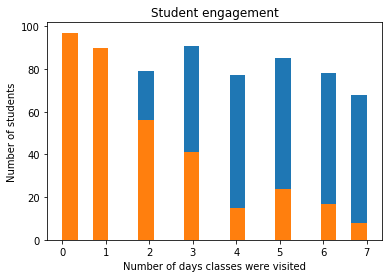

In [293]:
print '\npassing_engagement: days visited'
plt.xlabel("Number of days classes were visited")
plt.ylabel("Number of students")
plt.title("Student engagement")
plt.hist(days_visited_by_account_passing.values(), bins=20)

print '\nnon_passing_engagement: days visited'
plt.hist(days_visited_by_account_non_passing.values(), bins=20)

## Improving Plots and Sharing Findings

In [294]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.